In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('File1.csv')

Using TensorFlow backend.


In [2]:
df=df.drop(columns=['urutan','data'])
df.bulan = pd.to_datetime(df.bulan)
df = df.set_index("bulan")
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
df=df[:-60]

scaler = MinMaxScaler()
scaler.fit(data_4)
data_4 = scaler.transform(data_4)

In [3]:
# Load Model
model = keras.models.load_model('2_layer_50_100_e90.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


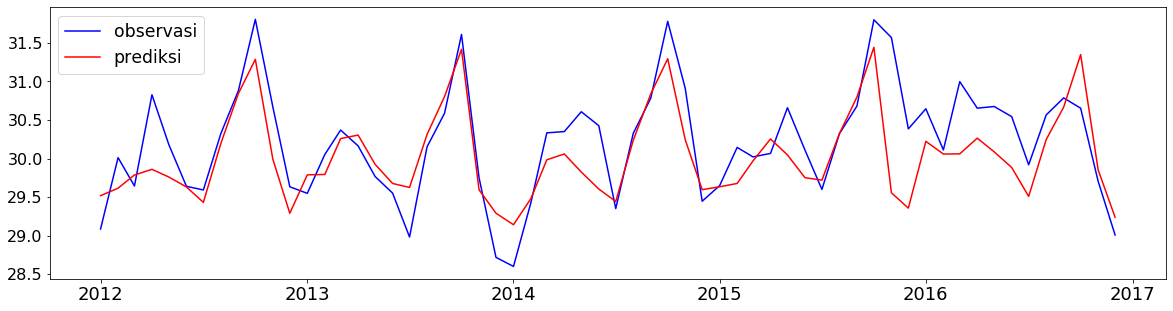

In [4]:
pred_list = []

n_features = 1
n_input = 12

batch = data_4[-60:-48].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-48:-36].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-36:-24].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch = data_4[-24:-12].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

batch = data_4[-12:].reshape((1, 12, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,61) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-60:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

plt.figure(figsize=(20, 5))
# plt.plot(df_proj.index, df_proj['data'])
plt.plot(data_5[-60:].index, data_5['rata2'][-60:],color='b', label="observasi")
plt.plot(df_proj[-60:].index, df_proj['Prediction'][-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

No handles with labels found to put in legend.


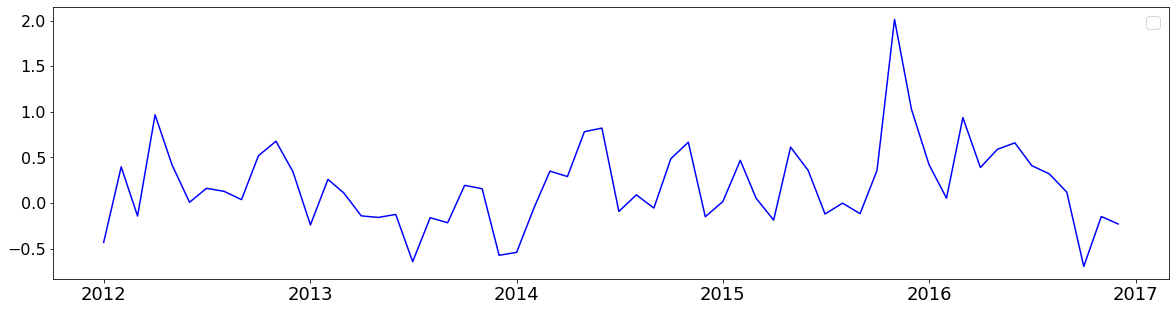

In [5]:
plt.figure(figsize=(20, 5))
MAE = data_5['rata2'][-60:]-df_proj['Prediction'][-60:]
plt.plot(data_5[-60:].index, MAE,color='b')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [6]:
MAE

bulan
2012-01-01   -0.431796
2012-02-01    0.396377
2012-03-01   -0.142920
2012-04-01    0.967616
2012-05-01    0.418388
2012-06-01    0.008153
2012-07-01    0.161043
2012-08-01    0.128629
2012-09-01    0.037257
2012-10-01    0.519024
2012-11-01    0.677717
2012-12-01    0.344032
2013-01-01   -0.240355
2013-02-01    0.259566
2013-03-01    0.110811
2013-04-01   -0.141024
2013-05-01   -0.158184
2013-06-01   -0.125188
2013-07-01   -0.643402
2013-08-01   -0.160876
2013-09-01   -0.216460
2013-10-01    0.193917
2013-11-01    0.156479
2013-12-01   -0.573231
2014-01-01   -0.541481
2014-02-01   -0.050262
2014-03-01    0.349544
2014-04-01    0.290484
2014-05-01    0.782190
2014-06-01    0.822089
2014-07-01   -0.092243
2014-08-01    0.089353
2014-09-01   -0.055299
2014-10-01    0.485307
2014-11-01    0.667321
2014-12-01   -0.150455
2015-01-01    0.015568
2015-02-01    0.467991
2015-03-01    0.051890
2015-04-01   -0.187176
2015-05-01    0.612860
2015-06-01    0.358908
2015-07-01   -0.120555
2015-